# Lecture 02

## EDA Framework - Exploratory Data Analysis with Visualization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('tab10')
# We have to check it lattert with online 

In [3]:
titanic = sns.load_dataset('titanic') 
titanic.head()
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
#['embark','pclass','who','adult male', 'alone'] ==> feature

In [5]:
# Dữ liệu dạng số: fare and age là số: Age Roi Rac , Fare Lien tuc 
#Biến là số nguyên: rời rạc 1 đơn vị tròn chĩnh duy nhất 
#Giữa 2 giá trị mà có cả giá trị liên tục: 10.1, 11.11 gọi là miền liên tục 
#How to know: We have to check 
# Còn lại: là phân loại 

In [6]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [ ]:
titanic['sibsp'].value_counts() # Roi rac 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [7]:
titanic.age.mode()

0    24.0
dtype: float64

In [8]:
titanic.fare.value_counts() # Lieen tuc

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

In [ ]:
# Category data: Norminal, Binary Orrdical 
# sex: binary 
# class: Normial
# alive: binary Yes or NO
# embark: Normial 

In [ ]:
# Database Lecture: http://mfe.neu.edu.vn/huong-dan-giang-day-hoc-tap-ly-thuyet-xac-suat-va-thong-ke-toan-cap-nhat-t8-2020/

In [9]:
titanic.describe() #100,25,75,mean

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.isnull().sum()/len(titanic) *100 #How many percent of data is null 

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

#### Examine statistics of dataset

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [12]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


![](https://spss-tutorials.com/img/standard-normal-distribution-with-probabilities.png)

How to check outliner

### Histogram

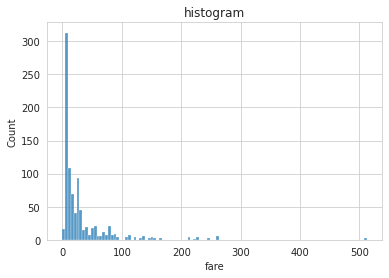

In [23]:
sns.histplot(data = titanic, x = 'fare')
#plt.hist(titanic.fare, bins = 100)
plt.title('histogram')
plt.show()

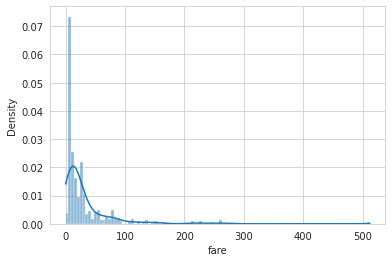

In [25]:
sns.histplot(data=titanic, x='fare', kde=True, stat= 'density')
#syntax: sms.<tenbieudo>(data=dataframe, x = [...],y =[...], hue = dulieuphanlop)

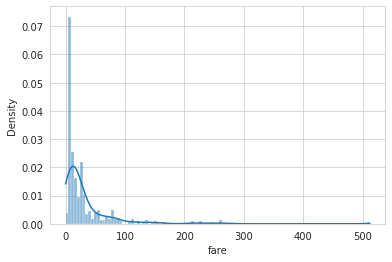

In [ ]:
sns.histplot(data=titanic, x='fare', kde=True, stat='density') #move count to sensity

<AxesSubplot:xlabel='fare', ylabel='Probability'>

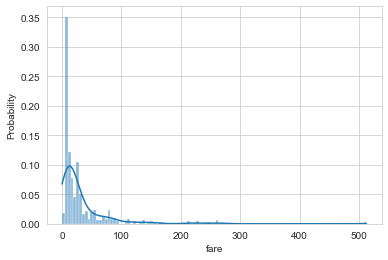

In [4]:
sns.histplot(data=titanic, x='fare', kde=True, stat='probability') #move count to probability

(0.0, 100.0)

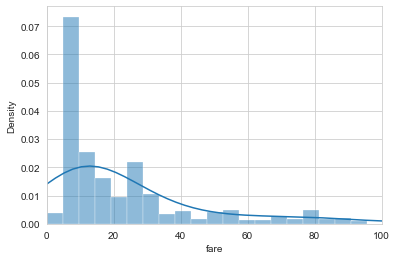

In [5]:
ax = sns.histplot(data=titanic, x='fare', kde=True, stat='density')
ax.set_xlim(0, 100)

(0.0, 100.0)

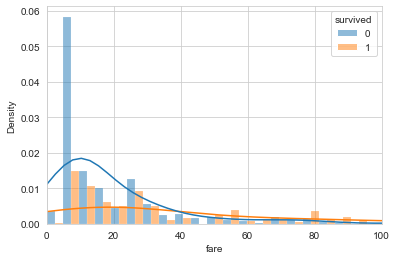

In [6]:
ax = sns.histplot(data=titanic, x='fare', kde=True, stat='density', hue='survived', multiple = 'dodge') # add 2 diagram together
ax.set_xlim(0, 100)

<AxesSubplot:xlabel='age', ylabel='Count'>

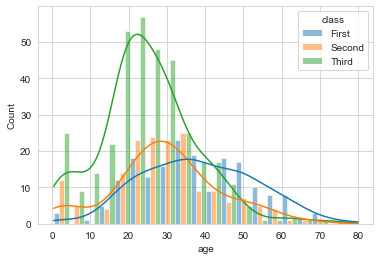

In [7]:
sns.histplot(data= titanic, x= 'age', kde = True, hue = 'class',multiple='dodge')

### Barplot

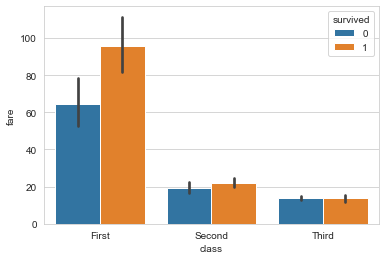

In [16]:
#sns.catplot(data=titanic, x='class', y='fare', kind = 'bar');#median value sns.catplot(data=titanic, x='class', y='fare', kind = 'bar');#median value 
sns.barplot(data=titanic, x='class', y='fare', hue = 'survived');#median value 

# error bar show 25%-75%

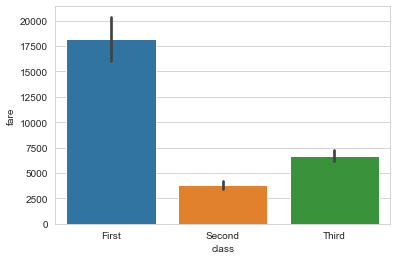

In [17]:
sns.barplot(data=titanic, x='class', y='fare', estimator=np.sum);

<AxesSubplot:xlabel='class', ylabel='fare'>

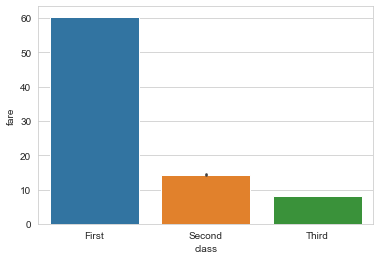

In [10]:
sns.barplot(data=titanic, x='class', y='fare',estimator=np.median, ci = True)

<AxesSubplot:xlabel='class', ylabel='fare'>

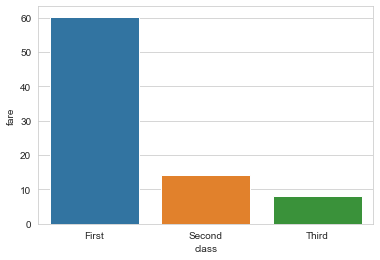

In [11]:
sns.barplot(data=titanic, x='class', y='fare',estimator=np.median, ci = False)

<AxesSubplot:xlabel='class', ylabel='fare'>

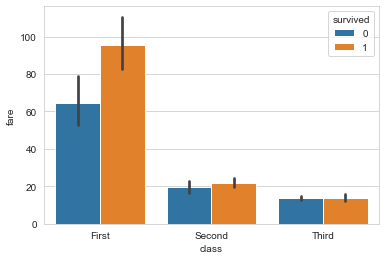

In [12]:
sns.barplot(data=titanic, x='class', y='fare', hue='survived')

<AxesSubplot:xlabel='class', ylabel='fare'>

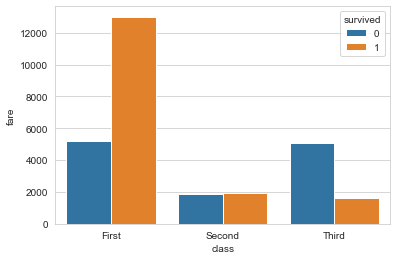

In [13]:
sns.barplot(data=titanic, x='class', y='fare', hue='survived', estimator=np.sum, ci=False)

### Countplot

In [44]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [45]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [46]:
titanic.who.isna().sum()

0

In [49]:
titanic['embark_town'].value_counts(dropna=False) #valuecount k hiện dropna therefore if wanna show the vluecount of also the nall value we have to dropna = False 

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

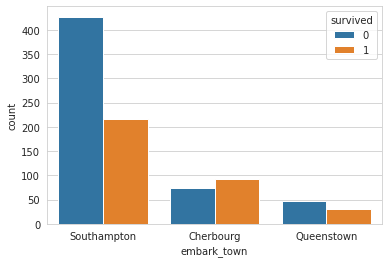

In [52]:
sns.countplot(data=titanic, x='embark_town',hue = 'survived')

### PiePlot

In [ ]:
data = titanic['embark_town'].value_counts()
data

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

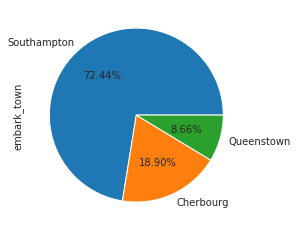

In [ ]:
data.plot.pie(autopct='%.2f%%',)#autopercentagest 

### Scatterplot

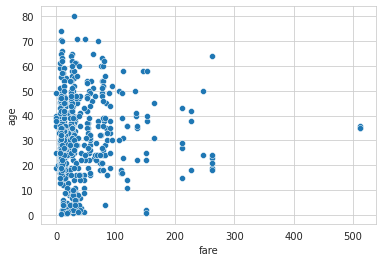

In [ ]:
sns.scatterplot(data=titanic, x='fare', y='age') # hai thằng biến dạng số (fare and age)

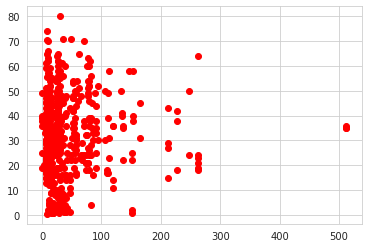

In [62]:
plt.scatter(titanic.fare, titanic.age,label="Fare and Age",color = 'red')

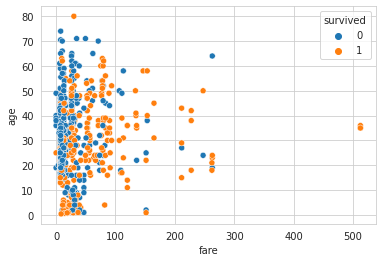

In [63]:
sns.scatterplot(data=titanic, x='fare', y='age', hue='survived')

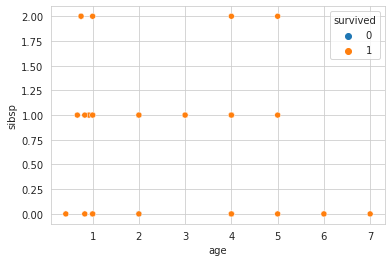

In [64]:
sns.scatterplot(data=titanic[(titanic.age < 8) & (titanic.sibsp <3)], x='age', y='sibsp', hue='survived')

In [65]:
# bias 

In [ ]:
# We have to validation to validate the model. If still can workd good 

### Boxplot & Violinplot

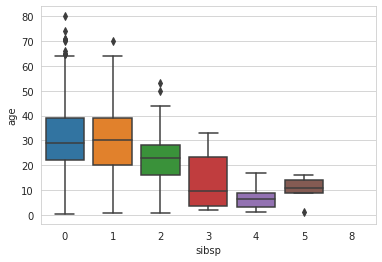

In [76]:
sns.boxplot(data=titanic, x='sibsp', y='age')

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTioub5J7S6ZgowDXEKv6GoZoMc-7dn5sTFnA&usqp=CAU)

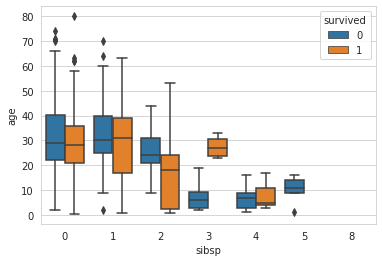

In [77]:
sns.boxplot(data=titanic, x='sibsp', y='age', hue='survived') #compare 1,0

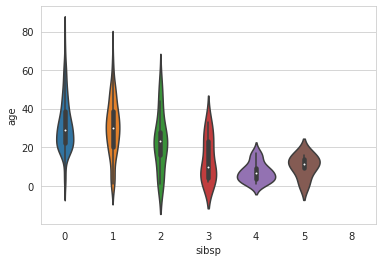

In [80]:
#sns.catplot(data=titanic, x='sibsp', y='age',kind ='violin')
sns.violinplot(data=titanic, x='sibsp', y='age')


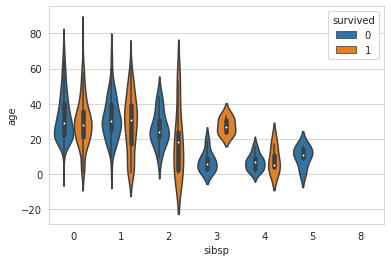

In [81]:
sns.violinplot(data=titanic, x='sibsp', y='age', hue='survived')

# Phinh cho nao thi nhieu gia tri nhat

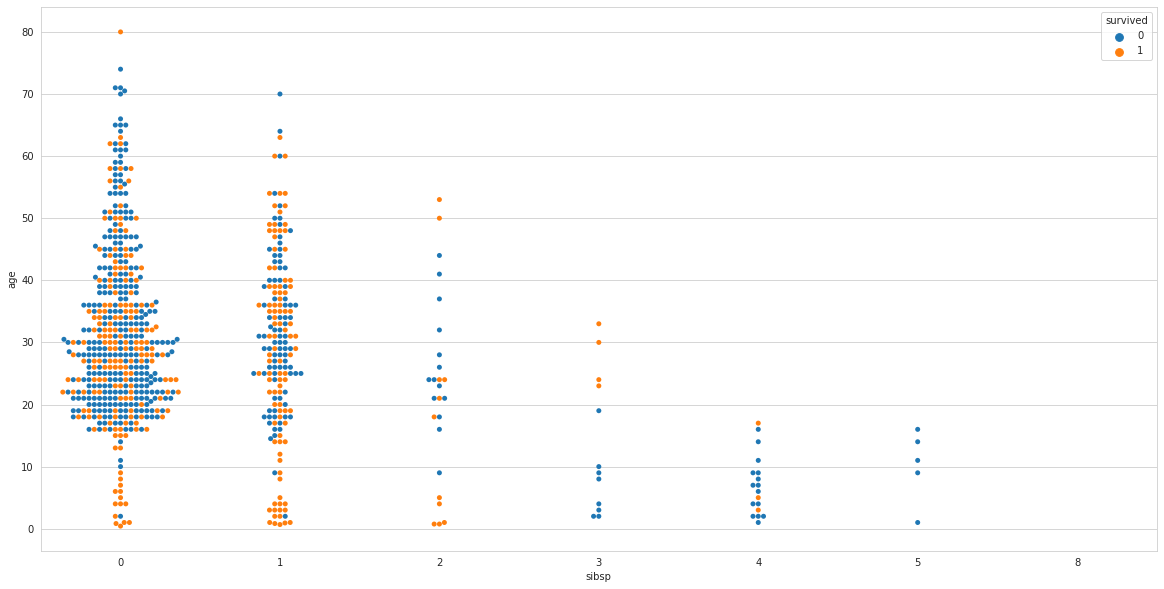

In [82]:
plt.figure(figsize=(20,10))
sns.swarmplot(data = titanic, x='sibsp', y= 'age', hue = 'survived')

### Heatmap

Use for correlation to show the relationship between our serials in dataframe

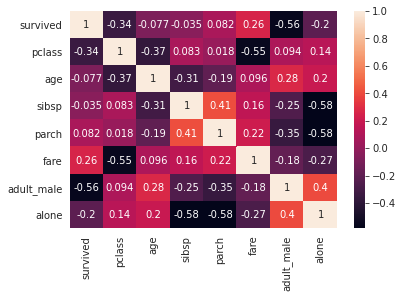

In [83]:
sns.heatmap(titanic.corr(), annot=True) # Annot Animation to how the detail number

In [84]:
titanic.corr() # pandas can encode the database -> number

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [1]:
correl = titanic['age','fare','sbsip']

NameError: name 'titanic' is not defined

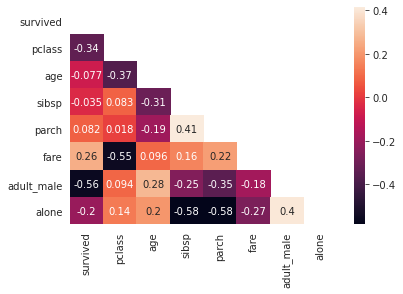

In [ ]:
mask = np.zeros_like(titanic.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic.corr(), annot=True, mask=mask)

### Jointplot

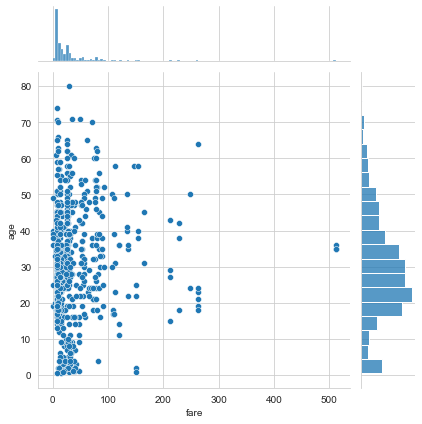

In [19]:
sns.jointplot(data=titanic, x='fare', y='age')

Text(0.5, 1.0, 'The diagram and hisrogram of fare and age depending on survived')

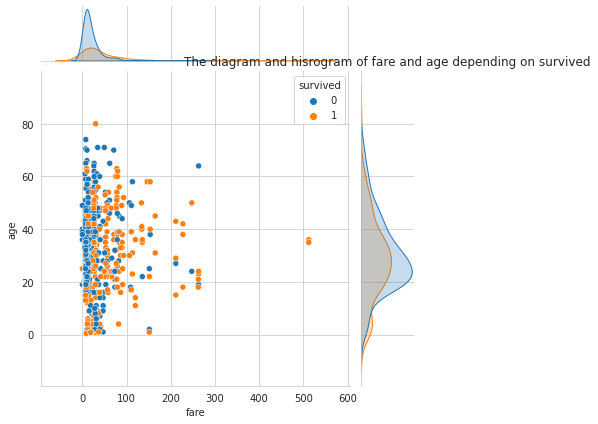

In [93]:
sns.jointplot(data=titanic, x='fare', y='age', hue='survived') #historgram+scatter
plt.title('The diagram and hisrogram of fare and age depending on survived',loc = 'center')

### FacetGrid

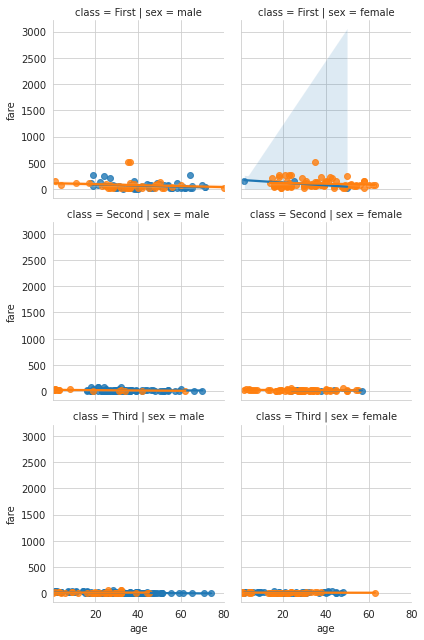

In [90]:
facet_grid = sns.FacetGrid(data=titanic, row='class', col='sex', hue='survived')
facet_grid.map(sns.regplot, 'age', 'fare')